In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scenario_data(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic_Stress', 'Predictability_Control_Stress', 'Value_Stress', 'Control_Stress', 'Predictability_stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state", 'Heuristic_Stress'], axis=1)
    df = df.groupby("state_name").mean()
    #df = df[df.state_name != "preflight"]
    try:
        df = df.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError:
        df = df.drop(["preflight"]) 
    fig = plt.figure(figsize=(10, 5))
    ax = df.plot(kind = "bar", figsize=(8, 5), title=name)
    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    plt.show()
    return df



In [63]:

df_scen1 = pd.read_csv("./data/stress_data_scenario_one__15-05.csv")
#df_scen1_b = pd.read_csv("./data/stress_data_scenario_one.csv")

#df_scen2 = pd.read_csv("./data/stress_data_scenario_two.csv")
df_scen3 = pd.read_csv("./data/stress_data_scenario_three__16-05.csv")

df_scen4 = pd.read_csv("./data/stress_data_scenario_four__16-05.csv")

df_scen4 = pd.read_csv("./data/stress_data_scenario_five__17-05.csv")


# TODO: Rename models to correspond with slide naming

<Figure size 720x360 with 0 Axes>

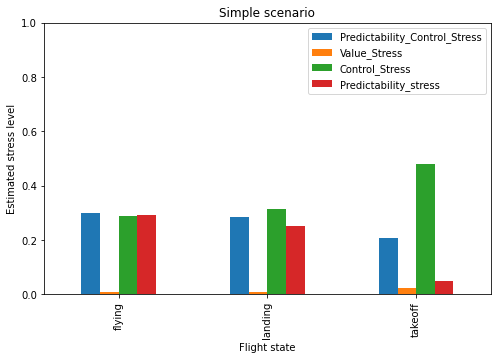

            Predictability_Control_Stress  Value_Stress  Control_Stress  \
state_name                                                                
flying                           0.300244      0.010060        0.289862   
landing                          0.284041      0.007206        0.314242   
takeoff                          0.205978      0.024040        0.478786   

            Predictability_stress  
state_name                         
flying                   0.293510  
landing                  0.251091  
takeoff                  0.048223  


In [60]:

df = plot_scenario_data(df_scen1, name="Simple scenario")
#df2 = plot_scenario_data(df_scen1_b)
print(df)

<Figure size 720x360 with 0 Axes>

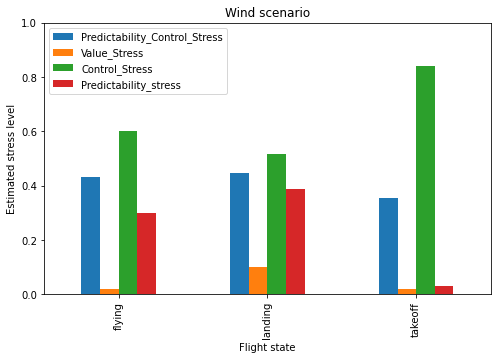

            Predictability_Control_Stress  Value_Stress  Control_Stress  \
state_name                                                                
flying                           0.431418      0.019990        0.600671   
landing                          0.448367      0.100544        0.515810   
takeoff                          0.354927      0.021349        0.840113   

            Predictability_stress  
state_name                         
flying                   0.299917  
landing                  0.386126  
takeoff                  0.032391  


In [62]:
df = plot_scenario_data(df_scen3, name="Wind scenario")
print(df)

<Figure size 720x360 with 0 Axes>

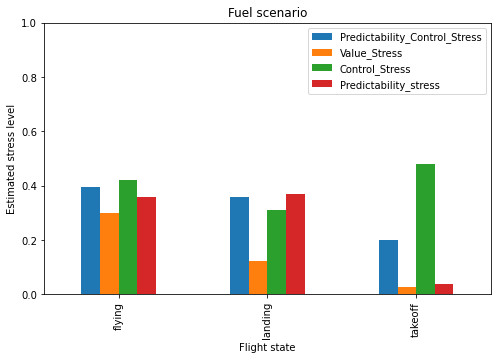

            Predictability_Control_Stress  Value_Stress  Control_Stress  \
state_name                                                                
flying                           0.395928      0.300843        0.419305   
landing                          0.358491      0.123292        0.311962   
takeoff                          0.199293      0.026089        0.478814   

            Predictability_stress  
state_name                         
flying                   0.356808  
landing                  0.369684  
takeoff                  0.038104  


In [65]:
df = plot_scenario_data(df_scen4, name="Fuel scenario")
print(df)

In [ ]:
df = plot_scenario_data(df_scen5, name="Fuel scenario")
print(df)